# 인공신경망 

### 순서

1. 데이터 준비
2. 인공신경망 모델
3. 최적화 함수
4. 학습 진행
5. 모델 검증

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

### 데이터 준비

In [2]:
# 데이터의 수를 설정합니다 ( 임의로 )
num_data = 1000

# 학습 반복 횟수를 정합니다
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=3)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15) # -15 ~ 15 사이에서 데이터를 추출

y = (x**2) + 3 # x제곱 + 3 의 데이터 생성
y_noise = y + noise # 학습 데이터 생성

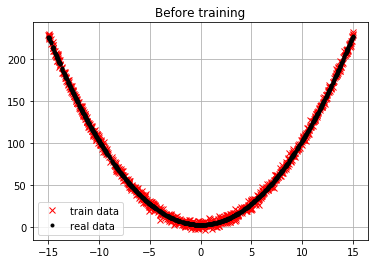

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x.data, y_noise.cpu().data, 'rx')
plt.plot(x.data, y.data, 'k.')
plt.legend(['train data', 'real data'])
plt.title('Before training')
plt.grid(True)
plt.show()

### 인공신경망 모델

1. https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_nn.html => nn.Sequential 에 대한 설명
 
 - 이 함수를 사용하지 않을 경우 하나하나 input 을 넣어줘야 하는 번거로움이 있음
 - Sequential 함수를 사용하게 되면 자동으로 모든 layer 을 통과하게 해준다

In [7]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=6),
    nn.ReLU(),
    nn.Linear(in_features=6, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features = 6),
    nn.ReLU(),
    nn.Linear(in_features=6, out_features=1)
)

### 최적화 함수 설정 / 손실 함수 설정

In [12]:
# 손실 함수 설정
loss_func = nn.L1Loss()

# 최적화 함수 설정
optimizer = optim.SGD(model.parameters(), lr=0.0001)
# Adam, Radam .. 다양하게 사용해도 됩니다

### 학습 진행

In [13]:
loss_array = [] # loss 를 별도로 저장하기 위해

# if not torch.cuda.is_available():
#     model = model.cuda()
#     x = x.cuda()
#     y_noise = y_noise.cuda()

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output, y_noise)
    loss.backward()
    
    optimizer.step()
    
    loss_array.append(loss.data)

### 시각화

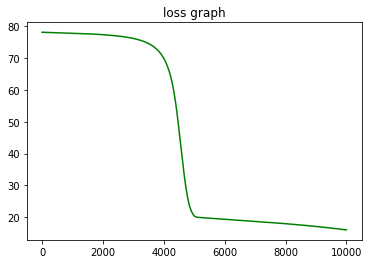

In [14]:
plt.plot(loss_array, 'g-')
plt.title('loss graph')
plt.show()

## 모델 검증

In [16]:
# 데이터의 수를 설정합니다 ( 임의로 )
num_data = 1000

test_x = init.uniform_(torch.Tensor(num_data, 1), -15, 15) # -15 ~ 15 사이에서 데이터를 추출
test_y = model(test_x)

# y = (x**2) + 3 # x제곱 + 3 의 데이터 생성
# y_noise = y + noise # 학습 데이터 생성

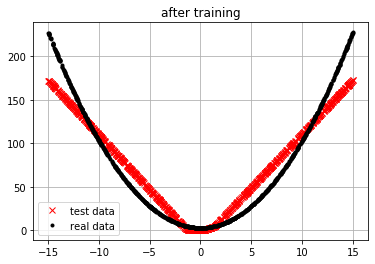

In [17]:
# import matplotlib.pyplot as plt
# %matplotlib inline

plt.plot(test_x.data, test_y.data, 'rx')
plt.plot(x.data, y.data, 'k.')
plt.legend(['test data', 'real data'])
plt.title('after training')
plt.grid(True)
plt.show()